## Predict stock prices with ML

## Gather data

In [20]:
!pip install -U scikit-learn

  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [22]:
import quandl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [23]:
quandl.ApiConfig.api_key= 'ckJ81pPXZ2Fm7wyFJcgj'

df = quandl.get("WIKI/AMZN")
df= df[['Adj. Close']]
df


,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


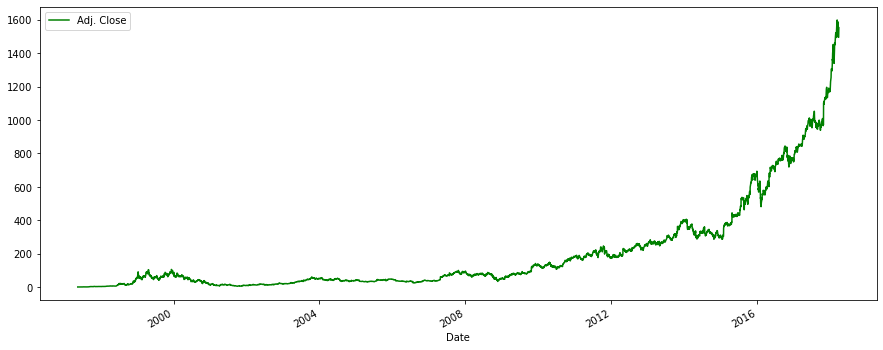

In [25]:
import matplotlib.pyplot as plt

df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()


In [26]:
#x=features, y=labels, forecast = 30 days
forecast = 30
df['Prediction']= df[['Adj. Close']].shift(-forecast)
df


,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
...,...,...
2018-03-21,1581.860000,NaN
2018-03-22,1544.100000,NaN
2018-03-23,1495.560000,NaN


In [30]:
import numpy as np

#drop Prediction column
X= np.array(df.drop(['Prediction'],1))

#standardize features, to set 0 means and sd=1
X=preprocessing.scale(X)
X


array([[-0.70904095],
       [-0.70911489],
       [-0.7093722 ],
       ...,
       [ 4.59285269],
       [ 4.80686902],
       [ 4.59814099]])

In [32]:
X.std()

1.0

In [34]:
#get the last 30 days of the dataset
#x and y has exact same length/column size
X_forecast= X[-forecast:]
X=X[:-forecast]

y=np.array(df['Prediction'])
y=y[:-forecast]


## Applying linear regression

In [35]:
#4 variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#apply linear regression model and fit our data
#clf- classifier
clf =LinearRegression()
clf.fit(X_train,y_train)

#calculate the score, confidence is mean accurary of the model, anything close to 1 is good, model performs well
confidence= clf.score(X_test, y_test)
confidence


0.9883296010822922

In [36]:
#predicted values of the last 30 days
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)


[1501.41313454 1540.29482605 1551.69118391 1537.7835838  1558.70350868
 1574.20723734 1576.16515503 1592.38182111 1615.73850225 1605.12956781
 1605.62968809 1585.41205977 1592.64784254 1617.50488451 1632.4340069
 1640.26567766 1647.56530557 1676.32754206 1697.07721323 1686.21289823
 1689.2136199  1679.97735602 1668.65548416 1640.19119166 1684.43587511
 1679.4878766  1639.30800053 1587.6572806  1651.82164837 1589.2427683 ]


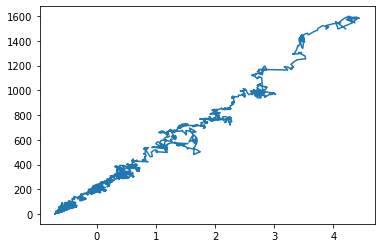

In [37]:
#scatterplot
plt.plot(X,y)


## Visualize predicted results

In [38]:
import datetime 

In [39]:
#range of mar 2018 to 30 days after that
dates=pd.date_range(start="2018-03-28", end="2018-04-26")
print(dates)


DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[ns]', freq='D')


<AxesSubplot:xlabel='Date'>

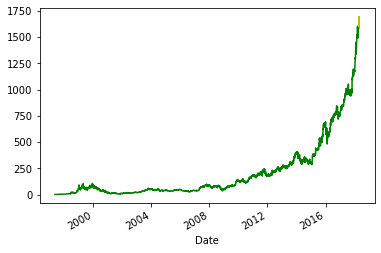

In [43]:
plt.plot(dates, forecast_predicted , color='y')
df['Adj. Close' ].plot(color='g')


(17282.0, 18029.5)

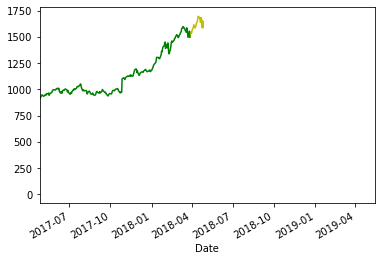

In [46]:
dates=pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted , color='y')
df['Adj. Close' ].plot(color='g')

#shift starting position from 1997 to 2017
plt.xlim(xmin=datetime.date(2017,4,26))
